In [1]:
#########################################################################################################################################
#Group Project Part II: Logistic Regression with Lasso & Ridge Regression
#Completed by Abdullah Afridi
#########################################################################################################################################

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split
import plotnine as pn
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
try:
    import warnings
    warnings.filterwarnings('ignore')
except:
    pass


In [6]:
df = pd.read_csv('heart.csv')
df[['target']] = ((-1)*df.target)+1
x = df.drop(columns=['target']).to_numpy(np.float32) #input array
#df['new'] = pd.Series([0 for x in range(len(df.index))], index=df.index) #mildly problematic
#y = df[['target']].to_numpy(np.float32) #output variable array
y = df.target
#y = df.Target #Why doesn't df[['SalePrice']] work?
def mse(model,x,y):
    y_hat = model.predict(x)
    err = np.mean((y-y_hat)**2)
    return err

In [7]:
df
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
#use for possible interactions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,-0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.430696


0.858085808580858

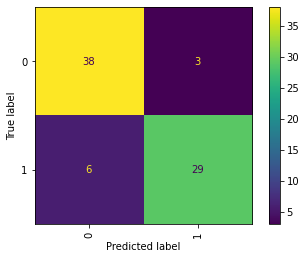

In [8]:
'''table = pd.crosstab(df['sex'], df['target'])
table
df.columns
'''
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y,
                                                random_state=42)
model = LogisticRegressionCV(penalty='l1', solver='liblinear')
model.fit(Xtrain, ytrain)

yfit = model.predict(Xtest)

cm = confusion_matrix(ytest, yfit) # Plot the confusion matrix
display_labels = 1
cm_display = ConfusionMatrixDisplay(cm).plot(xticks_rotation='vertical')
model.score(x,y)

0.858085808580858

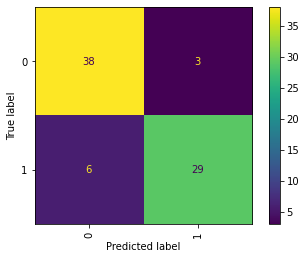

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y,
                                                random_state=42)
model2 = LogisticRegressionCV(penalty='l2', solver='liblinear')
model2.fit(Xtrain, ytrain)

yfit = model2.predict(Xtest)
cm = confusion_matrix(ytest, yfit)
# Plot the confusion matrix
display_labels = 1
cm_display2 = ConfusionMatrixDisplay(cm).plot(xticks_rotation='vertical')
model.score(x,y)


0.8947368421052632

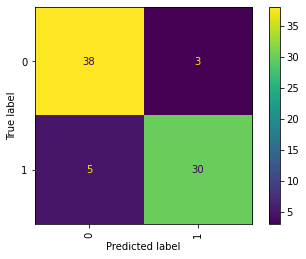

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y,test_size=.25,
                                                random_state=42)
model3 = LogisticRegressionCV()
model3.fit(Xtrain, ytrain)

yfit = model3.predict(Xtest)
cm = confusion_matrix(ytest, yfit)
# Plot the confusion matrix
display_labels = 1
cm_display3 = ConfusionMatrixDisplay(cm).plot(xticks_rotation='vertical')
model3.score(Xtest,ytest) #reports the raw accuracy (right/total)

In [19]:
model = LogisticRegression()
model.fit(x, y)
# Uses the k-fold cross-validation method to see how well the model works on new data
kf = KFold(n_splits=5)
res = cross_val_score(model, x, y, cv=kf, scoring=mse) #Look further into
cv_mse = res.mean()
res = cross_val_score(model, x, y, cv=kf)
cv_r2 = res.mean()

# Prints the R^2 and mean squared error values
print(model.score(x,y))
print(cv_r2, cv_mse)
print(np.exp(model.coef_))
print(1/log.C_) # (regularization param!)



0.8547854785478548
0.7520765027322404 0.24792349726775958
[[0.98698987 3.7360774  0.4378458  1.01572453 1.00299837 1.08465535
  0.58396456 0.97013564 2.18490335 1.65482655 0.59745641 2.04709152
  2.40235135]]
[0.04641589]


In [20]:
model = LogisticRegressionCV()
model.fit(x, y)
# Uses the k-fold cross-validation method to see how well the model works on new data
kf = KFold(n_splits=5)
res = cross_val_score(model, x, y, cv=kf, scoring=mse) #Look further into
cv_mse = res.mean()
res = cross_val_score(model, x, y, cv=kf)
cv_r2 = res.mean()

# Prints the R^2 and mean squared error values
print(model.score(x,y))
print(cv_r2, cv_mse)
print(np.exp(model.coef_))
print(1/log.C_) # (regularization param!)


0.8514851485148515
0.74224043715847 0.25775956284153
[[0.99971546 5.48338237 0.42746853 1.01852435 1.00432361 0.97341053
  0.62197175 0.97475434 2.53741736 1.70159134 0.55899747 2.15802054
  2.42927334]]
[0.04641589]


In [25]:
####LASSO#####
log = LogisticRegressionCV(penalty='l1', solver='liblinear')
log.fit(x,y)
kf = KFold(n_splits=5)
res = cross_val_score(log, x, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(log, x, y, cv=kf)
cv_r2 = res.mean()

# Prints the R^2 and mean squared error values
print('c-v R^2:', cv_r2, 'c-v mse:', cv_mse)
lassocoefs = np.exp(log.coef_) #log odds numbers exponentiated to get odds
print('Coefs', log.coef_)
print('Lambda: ', 1/log.C_) # (regularization param!)


c-v R^2: 0.7487431693989072 c-v mse: 0.2512568306010929
Coefs [[ 0.00311704  1.732482   -0.85591517  0.01899996  0.00451773 -0.01676661
  -0.46647581 -0.0240681   0.96170997  0.53568883 -0.5750018   0.76893976
   0.89139865]]
Lambda:  [0.04641589]


In [17]:
####LASSO 2#####
helpme = [.1,.2,.4,.5,.9,1,2,3,4]
log = LogisticRegressionCV(penalty='l1', solver='liblinear')
log.fit(x,y)
kf = KFold(n_splits=5)
res = cross_val_score(log, x, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(log, x, y, cv=kf)
cv_r2 = res.mean()

# Prints the R^2 and mean squared error values
print(cv_r2, cv_mse)
print('c-v R^2:', cv_r2, 'c-v mse:', cv_mse)
#print(log.coef_)
lassocoefs = np.exp(log.coef_) #log odds numbers exponentiated to get odds
print(lassocoefs)
print(log.score(x,y))
print(1/log.C_) # (regularization parameter)


0.7487431693989072 0.2512568306010929
c-v R^2: 0.7487431693989072 c-v mse: 0.2512568306010929
[[1.00317404 5.65644571 0.42487033 1.01918644 1.00453012 0.98328017
  0.62731688 0.97624502 2.61693304 1.70875795 0.56271871 2.15749842
  2.43890685]]
0.8514851485148515
[0.04641589]


In [127]:
for i in range(1, 13):
    print(df.columns[i], '          ', lassocoefs[0,i])
    var.append(df.columns[i])
var.pop(0)

sex            5.653751602242549
cp            0.4248947945434465
trestbps            1.0191736725224736
chol            1.004527231995644
fbs            0.9835124834456533
restecg            0.6271329563727596
thalach            0.9761968998293162
exang            2.6158779895723314
oldpeak            1.7084870548071547
slope            0.5627472409701282
ca            2.15742768734425
thal            2.4383452769046614


0

In [128]:
lassocoefs[0,3]

1.0191736725224736

In [181]:
####RIDGE#####
log = LogisticRegressionCV(penalty='l2', solver='liblinear')
log.fit(x,y)
res = cross_val_score(log, x, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(log, x, y, cv=kf)
cv_r2 = res.mean()

# Prints the R^2 and mean squared error values
print(cv_r2, cv_mse)
print('c-v R^2:', cv_r2, 'c-v mse:', cv_mse)
print(log.coef_)
ridgecoefs = np.exp(log.coef_)
print(log.score(x,y))
print(1/log.C_) # (regularization param!)




0.7389617486338798 0.2610382513661202
c-v R^2: 0.7389617486338798 c-v mse: 0.2610382513661202
[[-0.00857308  1.10292706 -0.75012508  0.01497082  0.0028647   0.0212967
  -0.38574804 -0.02883004  0.65390276  0.50311826 -0.43487041  0.68187401
   0.73217843]]
0.8547854785478548
[2.7825594]


In [130]:
delta = lassocoefs - ridgecoefs
#bar graph, dont necessarily have to subtract
#consider comparing to normal log reg without 
var
deltaList = delta.tolist()
deltaList
print(lassocoefs[0,1])
print(ridgecoefs[0,1])

5.653751602242549
3.0129722811068573


In [180]:
y_pred = log.predict(x)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 0]


In [172]:
kf = KFold(n_splits=5)
iter1 = [1,2,3,4,5,6,7,8,9,10]

#iter2 = iter1.append(iter1)
iter2 = [x/10 for x in iter1]
iter1.extend(iter2)
print(iter1)
iterable = [1/x for x in iter1]
accuracyList = []
listAccList = []
for i in iterable:
    a = [i]
    log = LogisticRegressionCV(penalty='l2', solver='liblinear', Cs = a)
    log.fit(x,y)
    res = cross_val_score(log, x, y, cv=kf)
    cv_r2 = res.mean()
    print('cv_r2:',(cv_r2),'  score:', log.score(x,y), '  Lambda:', 1/log.C_)
    listAccList.append(cv_r2)
    accuracyList.append([cv_r2, 1/log.C_])

accuracyList.sort(reverse = True)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cv_r2: 0.7521311475409835   score: 0.8514851485148515   Lambda: [1.]
cv_r2: 0.7520765027322404   score: 0.858085808580858   Lambda: [2.]
cv_r2: 0.7520765027322404   score: 0.8547854785478548   Lambda: [3.]
cv_r2: 0.7420765027322405   score: 0.8547854785478548   Lambda: [4.]
cv_r2: 0.7453551912568306   score: 0.8547854785478548   Lambda: [5.]
cv_r2: 0.7354098360655738   score: 0.8547854785478548   Lambda: [6.]
cv_r2: 0.7386885245901639   score: 0.8547854785478548   Lambda: [7.]
cv_r2: 0.7386885245901639   score: 0.8613861386138614   Lambda: [8.]
cv_r2: 0.7320218579234973   score: 0.8646864686468647   Lambda: [9.]
cv_r2: 0.7320218579234973   score: 0.8613861386138614   Lambda: [10.]
cv_r2: 0.7389617486338798   score: 0.8547854785478548   Lambda: [0.1]
cv_r2: 0.7389617486338798   score: 0.8547854785478548   Lambda: [0.2]
cv_r2: 0.7389617486338798   score: 0.8547854785478548   Lambda: [0.3]
cv_r2: 0.738961748

[0.7521311475409835, 0.7520765027322404, 0.7520765027322404, 0.7420765027322405, 0.7453551912568306, 0.7354098360655738, 0.7386885245901639, 0.7386885245901639, 0.7320218579234973, 0.7320218579234973, 0.7389617486338798, 0.7389617486338798, 0.7389617486338798, 0.7389617486338798, 0.7455191256830601, 0.7455191256830601, 0.7487978142076502, 0.7554098360655737, 0.7521311475409835, 0.7521311475409835]


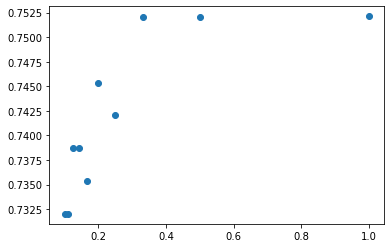

In [177]:
plt.scatter(iterable[0:10], listAccList[0:10])
print(listAccList)
plt.show()

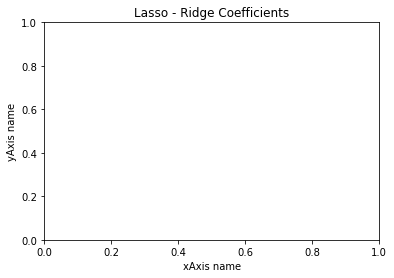

<Figure size 640x480 with 0 Axes>

<BarContainer object of 11 artists>

Text(0.5, 0, 'variables')

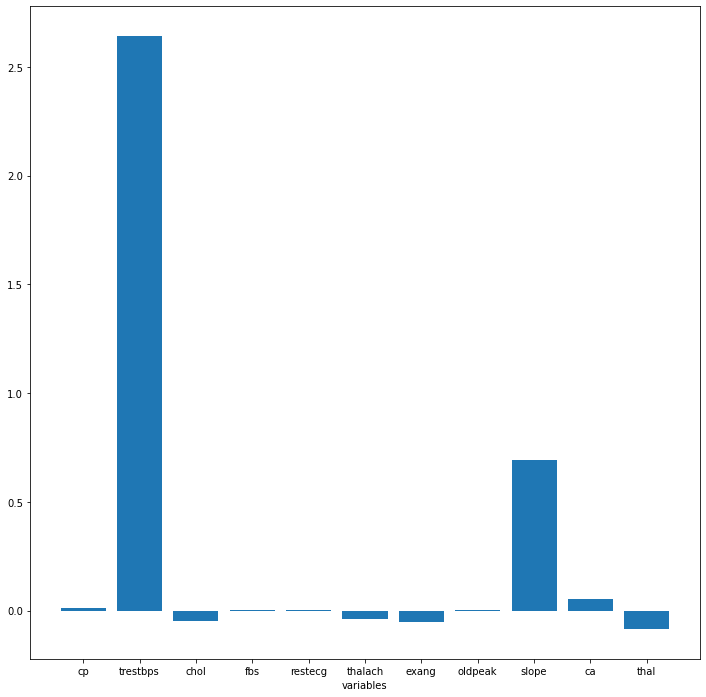

In [115]:
deltaList1 = [0.011613346819837722,
  2.641878256929849,
  -0.047398775709704855,
  0.004087999361456429,
  0.001659192173478985,
  -0.037974787404609245,
  -0.05280998402991355,
  0.0046107341512784394,
  0.6924859502117333,
  0.05458908745135349,
  -0.08461005005288902,
  0.17980501025361884,
  0.3585307681657781]
var1 = ['cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']
deltaList2 = ['cp','trestbps','chol','fbs','restecg','thalach',
 'exang',
 'oldpeak',
 'slope','ca','thal']
var2 = [0.011613346819837722,
  2.641878256929849,
  -0.047398775709704855,
  0.004087999361456429,
  0.001659192173478985,
                  -0.037974787404609245,
  -0.05280998402991355,
  0.0046107341512784394,
  0.6924859502117333,  0.05458908745135349,
  -0.08461005005288902,]



#plt.bar(var1, deltaList1)
plt.title('Lasso - Ridge Coefficients')
plt.yscale('linear')

plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.figure(figsize=(8, 6), dpi=80)


plt.show()
plt.figure(figsize=(12, 12))
display(
    plt.bar(deltaList2, var2),
    plt.xlabel('variables'),
    plt.ylabel('Difference'),
    
)


In [16]:
roc = roc_auc_score(y, model.decision_function(x), multi_class="ovr",average=None)
roc

0.9253403601229688